In [27]:
import pandas as pd

pops = pd.read_csv('../data/state_pops.csv')
titanic = pd.read_csv('../data/titanic.csv')
titanic['age'] = titanic['age'].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'], [None]).astype('float')

In [2]:
pops.set_index(['state', 'year'], inplace = True)

In [3]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [4]:
pops.sort_index(level=1, ascending=False)

,,population
state,year,
WY,2013,582658.0
WV,2013,1854304.0
WI,2013,5742713.0
WA,2013,6971406.0
VT,2013,626630.0
...,...,...
CA,1990,29959515.0
AZ,1990,3684097.0
AR,1990,2356586.0


In [5]:
pops.sort_index(level = [0,1], ascending=[False,True])

population
state year            
WY    1990    453690.0
      1991    459260.0
      1992    466251.0
      1993    473081.0
      1994    480283.0
...                ...
AK    2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0

[1272 rows x 1 columns]

In [6]:
pops.loc[[('MT', 1992)]]

,,population
state,year,
MT,1992,825770.0


In [7]:
pops.loc[:, [1990, 1991], :].sort_index(level=0)
# pops.loc[slice(None), [1990, 1991], :].sort_index(level=0)

population
state year            
AK    1990    553290.0
      1991    570193.0
AL    1990   4050055.0
      1991   4099156.0
AR    1990   2356586.0
...                ...
WI    1991   4964343.0
WV    1990   1792548.0
      1991   1798735.0
WY    1990    453690.0
      1991    459260.0

[106 rows x 1 columns]

In [8]:
pops.xs(2013, level = 'year') #XS Means Cross Section

,population
state,
AL,4833722.0
AK,735132.0
AZ,6626624.0
AR,2959373.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DE,925749.0
DC,646449.0


In [9]:
pops.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [10]:
pops.index.get_level_values(0).unique()

Index(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY', 'PR', 'USA'],
      dtype='object', name='state')

In [11]:
pops.index.get_level_values(1)

Int64Index([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004,
            ...
            2004, 2005, 2006, 2007, 2008, 2013, 2009, 2010, 2011, 2012],
           dtype='int64', name='year', length=1272)

In [12]:
even_years = pops.index.get_level_values(1) % 2 == 0
pops[even_years]

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2008    4718206.0
      2006    4628981.0
      2004    4530729.0
...                 ...
USA   2004  292805298.0
      2006  298379912.0
      2008  304093966.0
      2010  309326295.0
      2012  313873685.0

[636 rows x 1 columns]

In [13]:
pops.unstack(level = 'state')

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   
1995    604412.0  4296800.0  2535399.0  4432499.0  31696582.0  3826653.0   
1996    608569.0  4331103.0  2572109.0  4586940.0  32018834.0  3919972.0   
1997    612968.0  4367935.0  2601091.0  4736990.0  32486010.0  4018293.0   
1998    619933.0  4404701.0  2626289.0  4883342.0  32987675.0  4116639.0   
1999    624779.0  4430141.0  2651860.0  5023823.0  33499204.0  4226018.0   
2000    627963.0  4452173.0  2678588.0  5160586.0  33987977.0  4326921.0   
2001    633714.0  4467634.0  2691571.0  5273477.0  34479458.0  4425687.0   
2002    642337.0  4480089.0  2705927.0  5396255.0  34871843.0  4490406.0   
2003    648414.0  4503491.0  2724816.0  5510364.0  35253159.0  4528732.0   
2004    659286.0  4530729.0  2749686.0  5652404.0  35574576.0  4575013.0   
2005    666946.0  4569805.0  2781097.0  5839077.0  35827943.0  4631888.0   
2006    675302.0  4628981.0  2821761.0  6029141.0  36021202.0  4720423.0   
2007    680300.0  4672840.0  2848650.0  6167681.0  36250311.0  4803868.0   
2008    687455.0  4718206.0  2874554.0  6280362.0  36604337.0  4889730.0   
2009    698895.0  4757938.0  2896843.0  6343154.0  36961229.0  4972195.0   
2010    713868.0  4785570.0  2922280.0  6408790.0  37333601.0  5048196.0   
2011    723375.0  4801627.0  2938506.0  6468796.0  37668681.0  5118400.0   
2012    730307.0  4817528.0  2949828.0  6551149.0  37999878.0  5189458.0   
2013    735132.0  4833722.0  2959373.0  6626624.0  38332521.0  5268367.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   
1995   3324144.0  580519.0  729735.0  14537875.0  ...  5326936.0  18958751.0   
1996   3336685.0  572379.0  740978.0  14853360.0  ...  5416643.0  19340342.0   
1997   3349348.0  567739.0  751487.0  15186304.0  ...  5499233.0  19740317.0   
1998   3365352.0  565232.0  763335.0  15486559.0  ...  5570045.0  20157531.0   
1999   3386401.0  570220.0  774990.0  15759421.0  ...  5638706.0  20558220.0   
2000   3411777.0  572046.0  786373.0  16047515.0  ...  5703719.0  20944499.0   
2001   3432835.0  574504.0  795699.0  16356966.0  ...  5750789.0  21319622.0   
2002   3458749.0  573158.0  806169.0  16689370.0  ...  5795918.0  21690325.0   
2003   3484336.0  568502.0  818003.0  17004085.0  ...  5847812.0  22030931.0   
2004   3496094.0  567754.0  830803.0  17415318.0  ...  5910809.0  22394023.0   
2005   3506956.0  567136.0  845150.0  17842038.0  ...  5991057.0  22778123.0   
2006   3517460.0  570681.0  859268.0  18166990.0  ...  6088766.0  23359580.0   
2007   3527270.0  574404.0  871749.0  18367842.0  ...  6175727.0  23831983.0   
2008   3545579.0  580236.0  883874.0  18527305.0  ...  6247411.0  24309039.0   
2009   3561807.0  592228.0  891730.0  18652644.0  ...  6306019.0  24801761.0   
2010   3579210.0  605125.0  899711.0  18846054.0  ...  6356683.0  25245178.0   
2011   3588948.0  619624.0  90798

In [26]:
titanic[['sex']].describe()

,sex
count,1309
unique,2
top,male
freq,843


In [28]:
titanic.groupby(['pclass', 'sex'])['age'].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

<AxesSubplot:xlabel='pclass,sex'>

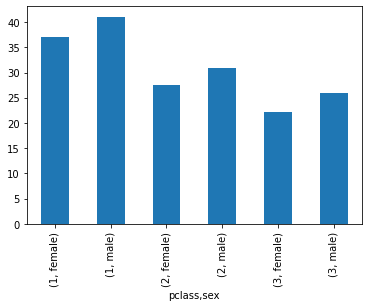

In [29]:
titanic.groupby(['pclass', 'sex'])['age'].mean().plot(kind = 'bar')

In [30]:
titanic.groupby(['pclass', 'sex'])['age'].mean().unstack()

sex,female,male
pclass,,
1,37.037594,41.029250
2,27.499191,30.815401
3,22.185307,25.962273


<AxesSubplot:xlabel='pclass'>

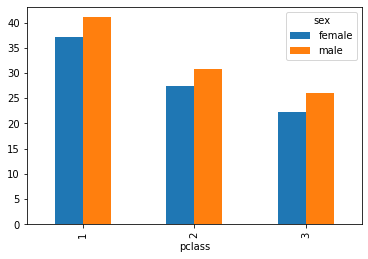

In [31]:
titanic.groupby(['pclass', 'sex'])['age'].mean().unstack().plot(kind = 'bar')

In [32]:
titanic.groupby(['pclass', 'sex'])['age'].mean().unstack(level = 'pclass')

pclass,1,2,3
sex,,,
female,37.037594,27.499191,22.185307
male,41.029250,30.815401,25.962273


<AxesSubplot:xlabel='sex'>

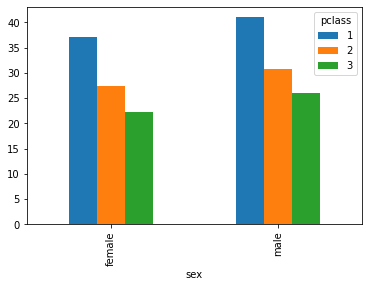

In [34]:
titanic.groupby(['pclass', 'sex'])['age'].mean().unstack(level = 'pclass').plot(kind = 'bar')